In [ ]:
Note : i wasnt developed this project. i got this through the linked-in if want to learn you can use this

# Holiday Package Prediciton
## 1) Problem statement.
"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering * Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficien

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [2]:
travel_data=pd.read_csv('./Data/Travel.csv')
travel_data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


## Above we successfully read the csv data
### now we are ready to perform data cleaning operation
1. Handling Missing values
2. Handling duplicates
3. check the data types
4. understand the dataset

In [4]:
travel_data.isnull().sum() # yes here some of fields having null values. we want to remove them

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [5]:
travel_data['Gender'].value_counts() # here we just count the total no of male and female

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

In [6]:
travel_data['MaritalStatus'].value_counts() # here we just count the people marial status

Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64

In [7]:
travel_data['TypeofContact'].value_counts()

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64

In [8]:
travel_data['Gender']=travel_data['Gender'].replace('Fe Male','Female') # here we just changed row Female instead of Fe Male 
travel_data['Gender'].value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

In [9]:
travel_data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [13]:
features_with_na=[features for features in travel_data.columns if travel_data[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,np.round(travel_data[feature].isnull().mean()*100,5),'% values')

# Here I just found the percentage of missing values 

Age 4.62357 % values
TypeofContact 0.51146 % values
DurationOfPitch 5.13502 % values
NumberOfFollowups 0.92062 % values
PreferredPropertyStar 0.53191 % values
NumberOfTrips 2.86416 % values
NumberOfChildrenVisiting 1.35025 % values
MonthlyIncome 4.76678 % values


In [15]:
travel_data[features_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


In [16]:
# Imputing NULL values
#Age
travel_data.Age.fillna(travel_data.Age.median(),inplace=True)

#TypeofContact

travel_data.TypeofContact.fillna(travel_data.TypeofContact.mode()[0],inplace=True)

#DurationOfPitch
travel_data.DurationOfPitch.fillna(travel_data.DurationOfPitch.median(),inplace=True)

#NumberOfFollowups
travel_data.NumberOfFollowups.fillna(travel_data.NumberOfFollowups.mode()[0],inplace=True)

#PreferredPropertyStar
travel_data.PreferredPropertyStar.fillna(travel_data.PreferredPropertyStar.mode()[0],inplace=True)

#NumberOfTrips
travel_data.NumberOfTrips.fillna(travel_data.NumberOfTrips.median(),inplace=True)

#NumberOfChildrenVisiting
travel_data.NumberOfChildrenVisiting.fillna(travel_data.NumberOfChildrenVisiting.mode()[0],inplace=True)

#MonthlyIncome
travel_data.MonthlyIncome.fillna(travel_data.MonthlyIncome.median(),inplace=True)


In [17]:
travel_data.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [25]:
# above we dont need customer ID, if it no need then remove it
travel_data.drop('CustomerID',axis=1,inplace=True)



In [26]:
travel_data.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


### Feature Engineering & Feature extraction

In [27]:
#here below we have just added who are all visiting  both person and childeren the we droped the column after adding these two
travel_data['TotalVisiting']=travel_data['NumberOfPersonVisiting']+travel_data['NumberOfChildrenVisiting']
travel_data.drop(['NumberOfPersonVisiting','NumberOfChildrenVisiting'],axis=1,inplace=True)

In [32]:
## Get all the numeric features

numeric_feaute=[numeric for numeric in travel_data.columns if travel_data[numeric].dtype!='O' ]
print('Total Numeric Feature:',len(numeric_feaute))

Total Numeric Feature: 12


In [33]:
# Get all catagorical feature
catagorical_fe=[cat_fea for cat_fea in travel_data.columns if travel_data[cat_fea].dtype =='O']
print('catagorical features:',len(catagorical_fe))

catagorical features: 6


In [36]:
#get all discreate feature
discreate_fet=[discreate_f for discreate_f in travel_data.columns if len(travel_data[discreate_f].unique()) <=25 ]
print('Discreate features:',len(discreate_fet))

Discreate features: 15


In [38]:
# Get all continous feature
ctne_feature=[feature for feature in travel_data if feature not in discreate_fet]
print('Num of Continuous Features :',len(ctne_feature))

Num of Continuous Features : 3


In [39]:
#Train Test Split model Train
from sklearn.model_selection import train_test_split
X=travel_data.drop('ProdTaken',axis=1)
y=travel_data['ProdTaken']

In [54]:
#Separate Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
X_train.shape,X_test.shape

((3910, 17), (978, 17))

In [57]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4888 non-null   float64
 1   TypeofContact           4888 non-null   object 
 2   CityTier                4888 non-null   int64  
 3   DurationOfPitch         4888 non-null   float64
 4   Occupation              4888 non-null   object 
 5   Gender                  4888 non-null   object 
 6   NumberOfFollowups       4888 non-null   float64
 7   ProductPitched          4888 non-null   object 
 8   PreferredPropertyStar   4888 non-null   float64
 9   MaritalStatus           4888 non-null   object 
 10  NumberOfTrips           4888 non-null   float64
 11  Passport                4888 non-null   int64  
 12  PitchSatisfactionScore  4888 non-null   int64  
 13  OwnCar                  4888 non-null   int64  
 14  Designation             4888 non-null   

In [58]:
# now we are gonna split catagorical and numerical colu
cat_feature=X.select_dtypes(include='object').columns
num_feature=X.select_dtypes(exclude='object').columns
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_Transformer=StandardScaler()
cat_transformer=OneHotEncoder(drop='first')

preprocessor=ColumnTransformer(
[
    ('OneHotEncoder',cat_transformer,cat_feature),
    ('StandardScaler',numeric_Transformer,num_feature)
]
)

In [59]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object'))])

In [60]:
#applying Transformation  X_train
X_train=preprocessor.fit_transform(X_train)


In [61]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,0.679690,0.782966,-0.382245,-0.774151
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.721400,0.690023,0.282777,-0.725271,1.511598,-0.632399,0.679690,0.782966,-0.459799,0.643615
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-1.020350,0.282777,1.771041,0.418708,-0.632399,0.679690,0.782966,-0.245196,-0.065268
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,-0.721400,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,1.408395,-1.277194,0.213475,-0.065268
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,2.400396,-1.720227,-0.725271,1.511598,-0.632399,-0.049015,-1.277194,-0.024889,2.061382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-0.653841,1.284279,-0.725271,-0.674182,-0.632399,-1.506426,0.782966,-0.536973,0.643615
3906,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.455047,-0.898180,-0.718725,1.771041,-1.220627,-0.632399,1.408395,0.782966,1.529609,-0.065268
3907,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.455047,1.545210,0.282777,-0.725271,2.058043,-0.632399,-0.777720,0.782966,-0.360576,0.643615
3908,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.455047,1.789549,1.284279,-0.725271,-0.127737,-0.632399,-1.506426,0.782966,-0.252799,0.643615


In [63]:
X_test=preprocessor.transform(X_test)

In [64]:
X_test

array([[ 0.        ,  0.        ,  0.        , ..., -1.2771941 ,
        -0.73751038, -0.77415132],
       [ 1.        ,  0.        ,  0.        , ..., -1.2771941 ,
        -0.6704111 , -0.06526803],
       [ 1.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.4208322 , -0.77415132],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  0.78296635,
         0.69001249,  0.64361526],
       [ 1.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.22827818, -0.77415132],
       [ 1.        ,  1.        ,  0.        , ...,  0.78296635,
        -0.44611323,  2.06138184]])

In [65]:
y_train

3995    0
2610    0
3083    0
3973    0
4044    0
       ..
4426    0
466     0
3092    0
3772    0
860     1
Name: ProdTaken, Length: 3910, dtype: int64

In [67]:
# Now we are gonna see the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,\
roc_auc_score,roc_curve


In [68]:
models={
    'RandomForestClassifier':RandomForestClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'LogisticRegression':LogisticRegression()
    
}



In [86]:
for  i in range(len(list(models))):   
    model=list(models.values())[i]
    model.fit(X_train,y_train) #train our model
    
    #make Prediction
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    
    #training set performance
    
    model_train_acc=accuracy_score(y_train,y_train_pred)
    model_train_f1_score=f1_score(y_train,y_train_pred,average='weighted')
    model_train_precision=precision_score(y_train,y_train_pred)
    model_train_recall=recall_score(y_train,y_train_pred)
    model_train_roc_acc_score=roc_auc_score(y_train,y_train_pred)
    
    #Test Performance
    
   
    model_test_acc=accuracy_score(y_test,y_test_pred)
    model_test_f1_score=f1_score(y_test,y_test_pred,average='weighted')
    model_test_precision=precision_score(y_test,y_test_pred)
    model_test_recall=recall_score(y_test,y_test_pred)
    model_test_roc_acc_score=roc_auc_score(y_test,y_test_pred)

    print(list(models.keys())[i])
    print('Model performance for training')

    print('> Accuracy_score{:.4f}'.format(model_train_acc))
    print('> F1 Score{:.4f}'.format(model_train_f1_score))
    print('> Precision Score{:.4f}'.format(model_train_precision))
    print('> Recall Score{:.4f}'.format(model_train_recall))
    print('> Roc_auc_score{:.4f}'.format(model_train_roc_acc_score))
    print('-'*15)

    print('Model performance for test')
    print(list(models.keys())[i])

    print('> Accuracy_score{:.4f}'.format(model_test_acc))
    print('> F1 Score{:.4f}'.format(model_test_f1_score))
    print('> Precision Score{:.4f}'.format(model_test_precision))
    print('> Recall Score{:.4f}'.format(model_test_recall))
    print('> Roc_auc_score{:.4f}'.format(model_test_roc_acc_score))
    
    print('*'*30)
    print('\n')
    

RandomForestClassifier
Model performance for training
> Accuracy_score1.0000
> F1 Score1.0000
> Precision Score1.0000
> Recall Score1.0000
> Roc_auc_score1.0000
---------------
Model performance for test
RandomForestClassifier
> Accuracy_score0.9223
> F1 Score0.9162
> Precision Score0.9457
> Recall Score0.6387
> Roc_auc_score0.8149
******************************


GradientBoostingClassifier
Model performance for training
> Accuracy_score0.8905
> F1 Score0.8778
> Precision Score0.8680
> Recall Score0.4870
> Roc_auc_score0.7350
---------------
Model performance for test
GradientBoostingClassifier
> Accuracy_score0.8579
> F1 Score0.8390
> Precision Score0.7653
> Recall Score0.3927
> Roc_auc_score0.6817
******************************


DecisionTreeClassifier
Model performance for training
> Accuracy_score1.0000
> F1 Score1.0000
> Precision Score1.0000
> Recall Score1.0000
> Roc_auc_score1.0000
---------------
Model performance for test
DecisionTreeClassifier
> Accuracy_score0.9121
> F1 Sco

In [91]:
# Hyperparameter Traning
rf_params={
    'max_depth':[5,18,15,None,10],
    'max_features':[5,7,'auto',8],
    'min_samples_split':[2,8,15,20],
    'n_estimators':[100,200,500,1000]
}

rf_params

{'max_depth': [5, 18, 15, None, 10],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [92]:
random_cv_model=[
    ('RF',RandomForestClassifier(),rf_params)
]

In [93]:
random_cv_model

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 18, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]})]

In [94]:
from sklearn.model_selection import RandomizedSearchCV

model_param={}

for name,model,params in random_cv_model:
    random=RandomizedSearchCV(
        estimator=model,
        param_distributions=params,
        n_iter=100,
        cv=3,
        verbose=2,
        n_jobs=1       
    )
    random.fit(X_train,y_train)
    model_param=random.best_params_
for model_name in model_param:
    print(f'-----------------------{model_name}------------------------')
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END max_depth=15, max_features=8, min_samples_split=15, n_estimators=100; total time=   0.5s
[CV] END max_depth=15, max_features=8, min_samples_split=15, n_estimators=100; total time=   0.6s
[CV] END max_depth=15, max_features=8, min_samples_split=15, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=8, min_samples_split=15, n_estimators=1000; total time=   5.0s
[CV] END max_depth=10, max_features=8, min_samples_split=15, n_estimators=1000; total time=   5.2s
[CV] END max_depth=10, max_features=8, min_samples_split=15, n_estimators=1000; total time=   4.7s
[CV] END max_depth=15, max_features=7, min_samples_split=20, n_estimators=500; total time=   2.4s
[CV] END max_depth=15, max_features=7, min_samples_split=20, n_estimators=500; total time=   2.4s
[CV] END max_depth=15, max_features=7, min_samples_split=20, n_estimators=500; total time=   2.4s
[CV] END max_depth=15, max_features=7, min_samples_s

[CV] END max_depth=10, max_features=8, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=auto, min_samples_split=20, n_estimators=1000; total time=   4.1s
[CV] END max_depth=10, max_features=auto, min_samples_split=20, n_estimators=1000; total time=   3.9s
[CV] END max_depth=10, max_features=auto, min_samples_split=20, n_estimators=1000; total time=   5.0s
[CV] END max_depth=None, max_features=5, min_samples_split=20, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, max_features=5, min_samples_split=20, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, max_features=5, min_samples_split=20, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, max_features=8, min_samples_split=2, n_estimators=1000; total time=   5.9s
[CV] END max_depth=10, max_features=8, min_samples_split=2, n_estimators=1000; total time=   6.6s
[CV] END max_depth=10, max_features=8, min_samples_split=2, n_estimators=1000; total time=   6.4s
[CV

[CV] END max_depth=None, max_features=8, min_samples_split=15, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, max_features=8, min_samples_split=15, n_estimators=100; total time=   0.6s
[CV] END max_depth=5, max_features=5, min_samples_split=8, n_estimators=500; total time=   1.6s
[CV] END max_depth=5, max_features=5, min_samples_split=8, n_estimators=500; total time=   1.6s
[CV] END max_depth=5, max_features=5, min_samples_split=8, n_estimators=500; total time=   1.4s
[CV] END max_depth=None, max_features=5, min_samples_split=8, n_estimators=1000; total time=   4.6s
[CV] END max_depth=None, max_features=5, min_samples_split=8, n_estimators=1000; total time=   5.0s
[CV] END max_depth=None, max_features=5, min_samples_split=8, n_estimators=1000; total time=   4.4s
[CV] END max_depth=None, max_features=5, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END max_depth=None, max_features=5, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END max_d

[CV] END max_depth=5, max_features=5, min_samples_split=15, n_estimators=500; total time=   1.6s
[CV] END max_depth=5, max_features=5, min_samples_split=15, n_estimators=500; total time=   1.4s
[CV] END max_depth=5, max_features=5, min_samples_split=15, n_estimators=500; total time=   1.5s
[CV] END max_depth=15, max_features=7, min_samples_split=20, n_estimators=1000; total time=   5.4s
[CV] END max_depth=15, max_features=7, min_samples_split=20, n_estimators=1000; total time=   5.7s
[CV] END max_depth=15, max_features=7, min_samples_split=20, n_estimators=1000; total time=   5.5s
[CV] END max_depth=15, max_features=8, min_samples_split=8, n_estimators=1000; total time=   6.2s
[CV] END max_depth=15, max_features=8, min_samples_split=8, n_estimators=1000; total time=   5.9s
[CV] END max_depth=15, max_features=8, min_samples_split=8, n_estimators=1000; total time=   5.8s
[CV] END max_depth=18, max_features=8, min_samples_split=2, n_estimators=1000; total time=   7.1s
[CV] END max_depth=1

In [95]:
models={
    
    "Random Forest":RandomForestClassifier(n_estimators=1000,min_samples_split=2,
                                          max_features=7,max_depth=None)
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9315
- F1 score: 0.9269
- Precision: 0.9559
- Recall: 0.6806
- Roc Auc Score: 0.8365




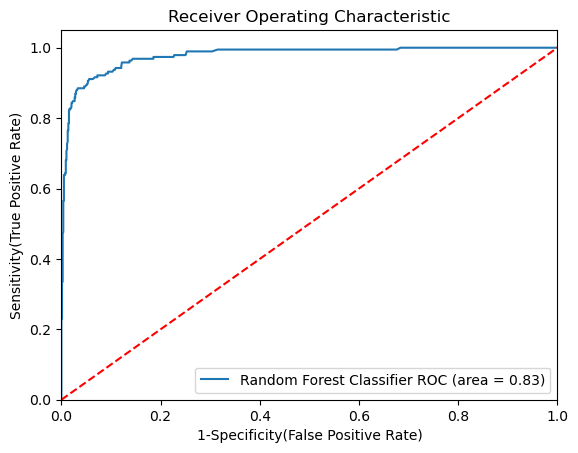

In [96]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Random Forest Classifier',
    'model': RandomForestClassifier(n_estimators=1000,min_samples_split=2,
                                          max_features=7,max_depth=None),
    'auc':  0.8325
},
    
]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 

#Done